# Projet 4 - Etude de santé publique

In [43]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [44]:
os.chdir(r"C:\Users\jbfal\OneDrive\Bureau\Open Classrooms\Formation\Projet 4 (27.06.2023)\Données")

### Lecture des tables

In [45]:
aide_alimentaire = pd.read_csv("aide_alimentaire.csv")
dispo_alimentaire = pd.read_csv("dispo_alimentaire.csv")
population = pd.read_csv("population.csv")
sous_nutrition = pd.read_csv("sous_nutrition.csv")
pd.options.display.float_format = "{:.3f}".format

### Analyse exploratoire des données

In [46]:
population.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [47]:
aide_alimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Pays bénéficiaire  1475 non-null   object
 1   Année              1475 non-null   int64 
 2   Produit            1475 non-null   object
 3   Valeur             1475 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.2+ KB


In [48]:
dispo_alimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15605 entries, 0 to 15604
Data columns (total 18 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           15605 non-null  object 
 1   Produit                                                        15605 non-null  object 
 2   Origine                                                        15605 non-null  object 
 3   Aliments pour animaux                                          2720 non-null   float64
 4   Autres Utilisations                                            5496 non-null   float64
 5   Disponibilité alimentaire (Kcal/personne/jour)                 14241 non-null  float64
 6   Disponibilité alimentaire en quantité (kg/personne/an)         14015 non-null  float64
 7   Disponibilité de matière grasse en quantité (g/personne/jo

In [49]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    1416 non-null   object 
 1   Année   1416 non-null   int64  
 2   Valeur  1416 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ KB


In [50]:
sous_nutrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Zone    1218 non-null   object
 1   Année   1218 non-null   object
 2   Valeur  624 non-null    object
dtypes: object(3)
memory usage: 28.7+ KB


### Changement de nom des colonnes

In [51]:
dispo_alimentaire.rename({"Zone":"Pays"}, axis = 1, inplace = True)
aide_alimentaire.rename({"Pays bénéficiaire":"Pays"}, axis = 1, inplace = True)
aide_alimentaire.rename({"Produit":"Type de produit"}, axis = 1, inplace = True)
aide_alimentaire.rename({"Valeur":"Quantité"}, axis = 1, inplace = True)
population.rename({"Zone":"Pays"}, axis = 1, inplace = True)
population.rename({"Valeur":"Nombre habitants"}, axis = 1, inplace = True)
sous_nutrition.rename({"Zone":"Pays"}, axis = 1, inplace = True)
sous_nutrition.rename({"Valeur":"Nombre individus sous-alimentés"}, axis= 1, inplace = True)

In [52]:
dispo_alimentaire.head()

,Pays,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.000,1.720,0.200,0.770,53.000,NaN,NaN,53.000,NaN,53.000,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.000,1.290,0.010,0.020,41.000,2.000,40.000,39.000,2.000,3.000,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.000,0.060,0.010,0.030,2.000,NaN,2.000,2.000,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.000,0.000,NaN,NaN,0.000,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.000,2.700,0.020,0.050,82.000,NaN,82.000,82.000,NaN,NaN,NaN,NaN,NaN


## Proportion de personnes en état de sous-nutrition en 2017 :

In [57]:
sous_nutrition_2017 = sous_nutrition[sous_nutrition["Année"] == "2016-2018"]
sous_nutrition_2017 = sous_nutrition_2017[sous_nutrition_2017["Nombre individus sous-alimentés"] != "<0.1"]
sous_nutrition_2017["Nombre individus sous-alimentés"] = sous_nutrition_2017["Nombre individus sous-alimentés"].astype(float)
nombre_pour_2017 = sous_nutrition_2017["Nombre individus sous-alimentés"].sum()
nombre_arrondi_pour_2017 = round(nombre_pour_2017, 6)
print("Le nombre de personnes qui sont en état de sous-nutrition en 2017 est de {:.1f} millions.".format(nombre_arrondi_pour_2017))

Le nombre de personnes qui sont en état de sous-nutrition en 2017 est de 535.7 millions.


In [12]:
population.head()

,Pays,Année,Nombre habitants
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [13]:
population["Nombre habitants"] = population["Nombre habitants"] / 1000
population_2017 = population[population["Année"] == 2017]["Nombre habitants"].sum()
proportion_totale = (nombre_arrondi_pour_2017 / population_2017) * 100
proportion_arrondie_pour_2017 = round(proportion_totale, 2)
print("{}% de la population mondiale est en état de sous-nutrition en 2017.".format(proportion_arrondie_pour_2017))

7.1% de la population mondiale est en état de sous-nutrition en 2017.


## Nombre théorique de personnes qui pourraient être nourries en 2017 :

In [14]:
population_2017_2 = population[population["Année"] == 2017]
fusion_requete_2 = pd.merge(dispo_alimentaire, population_2017_2, on=["Pays"])
fusion_requete_2["Disponibilité_totale"] = fusion_requete_2["Disponibilité alimentaire (Kcal/personne/jour)"] * fusion_requete_2["Nombre habitants"] / 2500
nombre_personnes_nourries = fusion_requete_2["Disponibilité_totale"].sum() / 1000
print("Le nombre de personnes qui pourraient être nourries en 2017 est de {:.3f} milliards.".format(nombre_personnes_nourries))

Le nombre de personnes qui pourraient être nourries en 2017 est de 8.368 milliards.


In [15]:
pour_calcul_2 = population_2017_2.sum()
proportion_chiffre_theorique = (nombre_personnes_nourries / pour_calcul_2["Nombre habitants"]) * 100000
chiffre_nourris_arrondi_pour_2017 = round(proportion_chiffre_theorique, 1)
print("{}% de la population mondiale pourrait théoriquement être nourrie en 2017.".format(chiffre_nourris_arrondi_pour_2017))

110.9% de la population mondiale pourrait théoriquement être nourrie en 2017.


## Nombre théorique de personnes qui pourraient être nourries uniquement avec les végétaux en 2017 :

In [16]:
dispo_alimentaire_vegetale = dispo_alimentaire[dispo_alimentaire["Origine"] == "vegetale"]
fusion_requete_3 = pd.merge(dispo_alimentaire_vegetale, population_2017_2, on=["Pays"])
fusion_requete_3["Disponibilité_végétale"] = fusion_requete_3["Disponibilité alimentaire (Kcal/personne/jour)"] * fusion_requete_3["Nombre habitants"] / 2500
nombre_personnes_nourries_vegetaux = fusion_requete_3["Disponibilité_végétale"].sum() / 1000
print("Le nombre d'individus qui pourraient être nourris avec uniquement des végétaux en 2017 est de {:.3f} milliards.".format(nombre_personnes_nourries_vegetaux))

Le nombre d'individus qui pourraient être nourris avec uniquement des végétaux en 2017 est de 6.904 milliards.


In [17]:
proportion_chiffre_theorique_vegetaux = (nombre_personnes_nourries_vegetaux / pour_calcul_2["Nombre habitants"]) * 100000
chiffre_nourris_vegetaux_arrondi_pour_2017 = round(proportion_chiffre_theorique_vegetaux, 1)
print("{}% de la population mondiale pourrait théoriquement être nourrie avec uniquement des végétaux en 2017.".format(chiffre_nourris_vegetaux_arrondi_pour_2017))

91.5% de la population mondiale pourrait théoriquement être nourrie avec uniquement des végétaux en 2017.


## Proportion de chaque catégorie dans la disponibilité intérieure :

In [18]:
categories_requete4 = ["Semences", "Pertes", "Nourriture", "Aliments pour animaux", "Traitement", "Autres Utilisations"]
resultats_requete4 = {}

for categorie in categories_requete4:
    somme_categorie_r4 = dispo_alimentaire[categorie].sum()

    pourcentage_dispo_int = (somme_categorie_r4 / dispo_alimentaire["Disponibilité intérieure"].sum()) * 100
    resultats_requete4[categorie] = pourcentage_dispo_int

for categorie, pourcentage_dispo_int in resultats_requete4.items():
    print(f"{categorie}: {pourcentage_dispo_int:.2f}%")

Semences: 1.57%
Pertes: 4.61%
Nourriture: 49.51%
Aliments pour animaux: 13.24%
Traitement: 22.38%
Autres Utilisations: 8.78%


#### Graphique

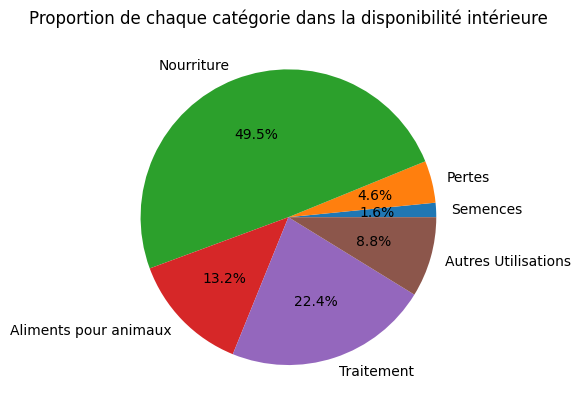

In [19]:
pourcentages_graph4 = list(resultats_requete4.values())
labels_graph4 = list(resultats_requete4.keys())
plt.pie(pourcentages_graph4, labels=labels_graph4, autopct="%.1f%%")
plt.title("Proportion de chaque catégorie dans la disponibilité intérieure")
plt.show()

## La part de l'utilisation des principales céréales entre l'alimentation humaine et animale :

In [20]:
cereales_r5 = ["Blé", "Riz (Eq Blanchi)", "Orge", "Maïs", "Seigle", "Avoine", "Millet", "Sorgho", "Céréales, Autres"]

total_utilisation_humaine = 0
total_utilisation_animale = 0

for cereale in cereales_r5:
    cereale_apres_filtrage = dispo_alimentaire["Produit"] == cereale
    donnees_cereales_r5 = dispo_alimentaire[cereale_apres_filtrage]

    utilisation_conso_humaine = donnees_cereales_r5["Nourriture"].sum()
    utilisation_conso_animale = donnees_cereales_r5["Aliments pour animaux"].sum()

    total_toutes_utilisations = utilisation_conso_humaine + utilisation_conso_animale

    total_utilisation_humaine += utilisation_conso_humaine
    total_utilisation_animale += utilisation_conso_animale

    part_utilisation_humaine = utilisation_conso_humaine / total_toutes_utilisations * 100
    part_utilisation_animale = utilisation_conso_animale / total_toutes_utilisations * 100

    print("La part de l'utilisation de la céréale", cereale, "entre l'alimentation humaine et animale est donc respectivement de :")
    print("{:.2f}% pour l'alimentation humaine".format(part_utilisation_humaine))
    print("{:.2f}% pour l'alimentation animale".format(part_utilisation_animale))
    print()

utilisation_generale_humaine = total_utilisation_humaine / (total_utilisation_humaine + total_utilisation_animale) * 100
utilisation_generale_animale = total_utilisation_animale / (total_utilisation_humaine + total_utilisation_animale) * 100
    
print("La part totale de l'utilisation des principales céréales entre l'alimentation humaine et animale est donc respectivement de :")
print("{:.2f}% pour l'alimentation humaine".format(utilisation_generale_humaine))
print("{:.2f}% pour l'alimentation animale".format(utilisation_generale_animale))

La part de l'utilisation de la céréale Blé entre l'alimentation humaine et animale est donc respectivement de :
77.93% pour l'alimentation humaine
22.07% pour l'alimentation animale

La part de l'utilisation de la céréale Riz (Eq Blanchi) entre l'alimentation humaine et animale est donc respectivement de :
91.82% pour l'alimentation humaine
8.18% pour l'alimentation animale

La part de l'utilisation de la céréale Orge entre l'alimentation humaine et animale est donc respectivement de :
6.83% pour l'alimentation humaine
93.17% pour l'alimentation animale

La part de l'utilisation de la céréale Maïs entre l'alimentation humaine et animale est donc respectivement de :
18.65% pour l'alimentation humaine
81.35% pour l'alimentation animale

La part de l'utilisation de la céréale Seigle entre l'alimentation humaine et animale est donc respectivement de :
40.45% pour l'alimentation humaine
59.55% pour l'alimentation animale

La part de l'utilisation de la céréale Avoine entre l'alimentation hu

#### Graphique

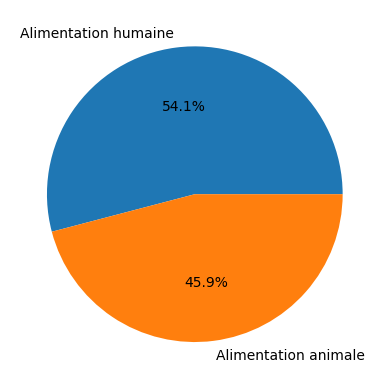

In [21]:
labels = ["Alimentation humaine", "Alimentation animale"]
sizes = [utilisation_generale_humaine, utilisation_generale_animale]

plt.pie(sizes, labels = labels, autopct = "%1.1f%%")
plt.show()

## Top 10 des pays avec la plus haute proportion de sous-nutrition en 2017 :

In [22]:
fusion_requete_6 = pd.merge(sous_nutrition_2017, population_2017_2, on = "Pays")
fusion_requete_6["Proportion sous-nutrition"] = (fusion_requete_6["Nombre individus sous-alimentés"] / fusion_requete_6["Nombre habitants"]) * 100
top_10_pays_r6 = fusion_requete_6.sort_values("Proportion sous-nutrition", ascending = False).head(10)
top_10_pays_r6 = top_10_pays_r6[["Pays", "Proportion sous-nutrition"]]
top_10_pays_r6.head(10)

,Pays,Proportion sous-nutrition
69,Haïti,48.259
142,République populaire démocratique de Corée,47.189
96,Madagascar,41.063
92,Libéria,38.280
89,Lesotho,38.249
165,Tchad,37.958
146,Rwanda,35.056
108,Mozambique,32.811
168,Timor-Leste,32.174
0,Afghanistan,28.929


#### Graphique

Text(0, 0.5, 'Pays')

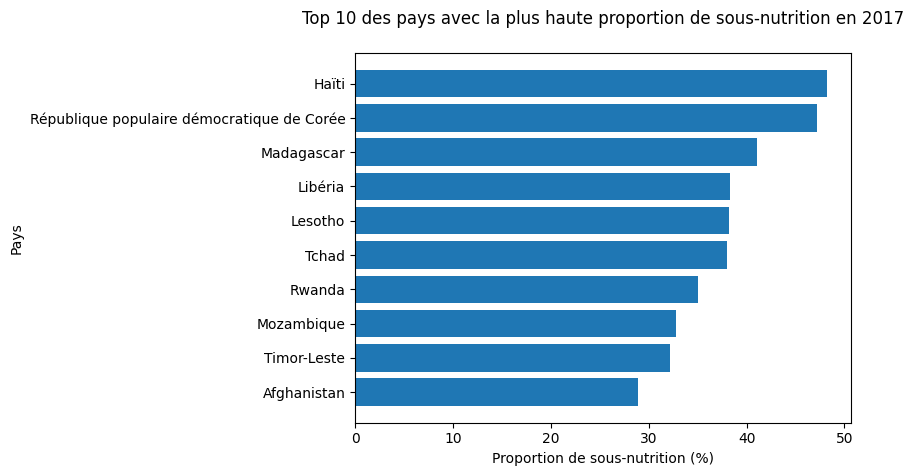

In [23]:
plt.barh(top_10_pays_r6["Pays"][::-1], top_10_pays_r6["Proportion sous-nutrition"][::-1])
plt.title("Top 10 des pays avec la plus haute proportion de sous-nutrition en 2017\n")
plt.xlabel("Proportion de sous-nutrition (%)")
plt.ylabel("Pays")

## Top 10 des pays ayant reçu le plus d'aide alimentaire entre 2013 et 2016 :

In [24]:
periode_2013a2016 = aide_alimentaire[aide_alimentaire["Année"].between(2013, 2016)]
aide_total_par_pays = periode_2013a2016.groupby("Pays")["Quantité"].sum()
aide_total_par_pays = aide_total_par_pays.sort_values(ascending = False).head(10)
aide_total_par_pays.head(10)

Pays
République arabe syrienne           1858943
Éthiopie                            1381294
Yémen                               1206484
Soudan du Sud                        695248
Soudan                               669784
Kenya                                552836
Bangladesh                           348188
Somalie                              292678
République démocratique du Congo     288502
Niger                                276344
Name: Quantité, dtype: int64

#### Graphique

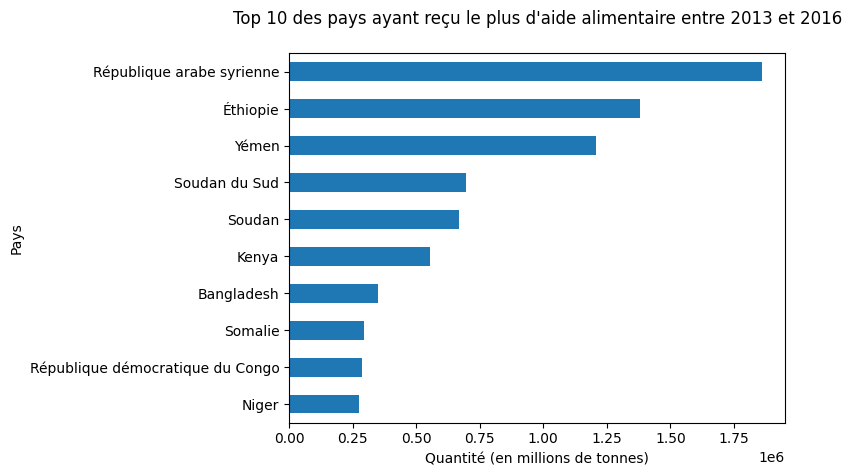

In [25]:
x7 = aide_total_par_pays
x7.head(10)[::-1].plot(kind = "barh")
plt.title("Top 10 des pays ayant reçu le plus d'aide alimentaire entre 2013 et 2016\n")
plt.xlabel("Quantité (en millions de tonnes)")
plt.ylabel("Pays")
plt.show()

## Evolution de l'aide alimentaire de 2013 à 2015 :

In [26]:
pays_liste_requete8 = ["République arabe syrienne", "Éthiopie", "Yémen", "Soudan du Sud", "Soudan"]
resultats_requete8 = pd.DataFrame()

for pays in pays_liste_requete8:
    aide_alimentaire_pays_requete8 = aide_alimentaire[(aide_alimentaire["Pays"] == pays) & (aide_alimentaire["Année"])]

    total_aide_alimentaire_r8 = aide_alimentaire_pays_requete8.groupby("Année")["Quantité"].sum()
    evolution_pays_requete8 = total_aide_alimentaire_r8.pct_change() * 100
    resultats_requete8[pays] = evolution_pays_requete8

print(resultats_requete8)

       République arabe syrienne  Éthiopie  Yémen  Soudan du Sud  Soudan
Année                                                                   
2013                         NaN       NaN    NaN            NaN     NaN
2015                      -6.852   -65.630 40.618        -75.394 -94.655


#### Graphique

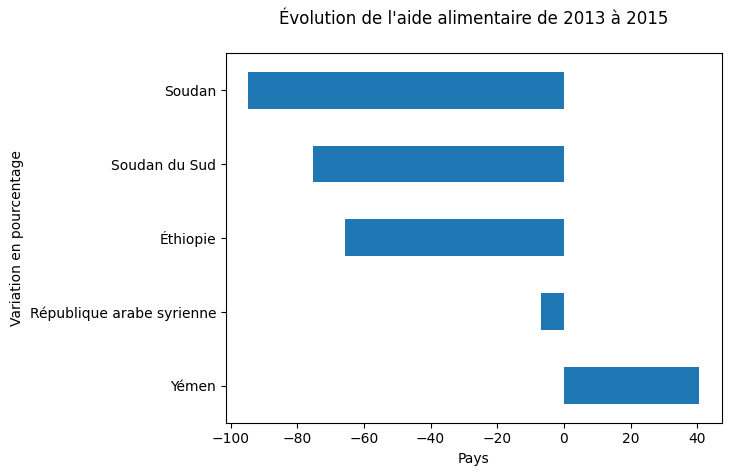

In [27]:
donnees_2015_graph = resultats_requete8.loc[2015]
donnees_2015_graph = donnees_2015_graph.sort_values(ascending = False)
donnees_2015_graph.plot(kind = "barh")
plt.title("Évolution de l'aide alimentaire de 2013 à 2015\n")
plt.xlabel("Pays")
plt.ylabel("Variation en pourcentage")
plt.show()

## Top 10 des pays avec la plus forte/faible disponibilité alimentaire par habitant :

### Plus forte disponibilité alimentaire

In [28]:
dispo_alimentaire_r9 = dispo_alimentaire.groupby("Pays")["Disponibilité alimentaire (Kcal/personne/jour)"].sum().reset_index()
dispo_alimentaire_classement_decroissant = dispo_alimentaire_r9.sort_values("Disponibilité alimentaire (Kcal/personne/jour)", ascending=False)
top_10_pays_dispo_alimentaire91 = dispo_alimentaire_classement_decroissant.head(10)
top_10_pays_dispo_alimentaire91["Pays"].tolist()
top_10_pays_dispo_alimentaire91.head(10)

,Pays,Disponibilité alimentaire (Kcal/personne/jour)
11,Autriche,3770.000
16,Belgique,3737.000
159,Turquie,3708.000
171,États-Unis d'Amérique,3682.000
74,Israël,3610.000
72,Irlande,3602.000
75,Italie,3578.000
89,Luxembourg,3540.000
168,Égypte,3518.000
4,Allemagne,3503.000


### Plus faible disponibilité alimentaire

In [29]:
dispo_alimentaire_r9 = dispo_alimentaire.groupby("Pays")["Disponibilité alimentaire (Kcal/personne/jour)"].sum().reset_index()
dispo_alimentaire_classement_croissant = dispo_alimentaire_r9.sort_values("Disponibilité alimentaire (Kcal/personne/jour)", ascending=True)
top_10_pays_dispo_alimentaire92 = dispo_alimentaire_classement_croissant.head(10)
top_10_pays_dispo_alimentaire92["Pays"].tolist()
top_10_pays_dispo_alimentaire92.head(10)

,Pays,Disponibilité alimentaire (Kcal/personne/jour)
128,République centrafricaine,1879.000
166,Zambie,1924.000
91,Madagascar,2056.000
0,Afghanistan,2087.000
65,Haïti,2089.000
133,République populaire démocratique de Corée,2093.000
151,Tchad,2109.000
167,Zimbabwe,2113.000
114,Ouganda,2126.000
154,Timor-Leste,2129.000


#### Graphique

Text(0, 0.5, 'Pays')

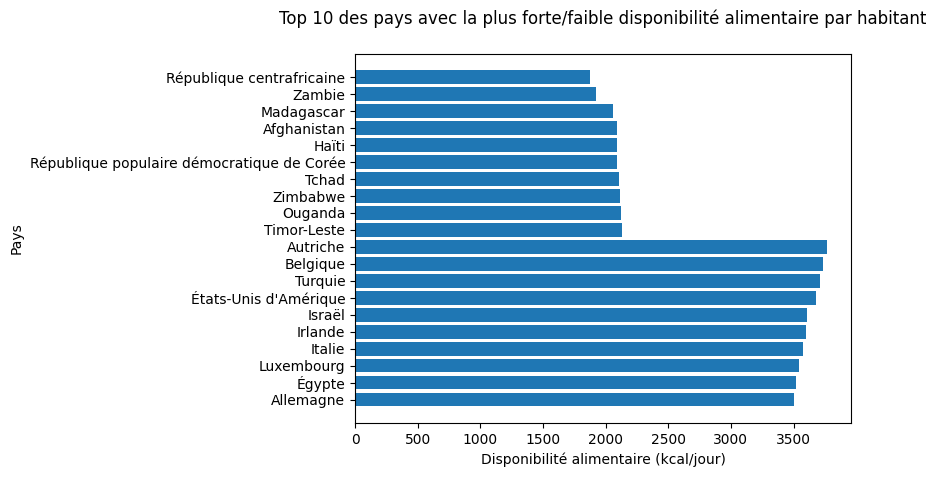

In [30]:
top_10_pays_r9 = dispo_alimentaire_classement_decroissant.iloc[:10]
pire_10_pays_r9 = dispo_alimentaire_classement_croissant.iloc[:10]
nouvelle_table = pd.concat([pire_10_pays_r9, top_10_pays_r9])

plt.barh(nouvelle_table["Pays"][::-1], nouvelle_table["Disponibilité alimentaire (Kcal/personne/jour)"][::-1])
plt.title("Top 10 des pays avec la plus forte/faible disponibilité alimentaire par habitant\n")
plt.xlabel("Disponibilité alimentaire (kcal/jour)")
plt.ylabel("Pays")

## Informations complémentaires

#### Le nombre de personnes qui sont en état de sous-nutrition en Thaïlande

In [31]:
sous_nutrition_thailande = sous_nutrition[(sous_nutrition["Pays"] == "Thaïlande") & (sous_nutrition["Année"] == "2017-2019") & (sous_nutrition["Nombre individus sous-alimentés"] != "<0.1")].copy()
sous_nutrition_thailande["Nombre individus sous-alimentés"] = sous_nutrition_thailande["Nombre individus sous-alimentés"].astype(float)
nombre_pour_2018_thailande = sous_nutrition_thailande["Nombre individus sous-alimentés"].sum()
nombre_arrondi_pour_2018_thailande = round(nombre_pour_2018_thailande, 6)
print("Le nombre de personnes qui sont en état de sous-nutrition en Thaïlande est de {:.1f} millions.".format(nombre_arrondi_pour_2018_thailande))

Le nombre de personnes qui sont en état de sous-nutrition en Thaîlande est de 6.5 millions.


#### Pourcentage de la population en état de sous-nutrition en Thaïlande

In [32]:
population_thailande = population[population["Pays"] == "Thaïlande"].copy()
valeur_population_thailande = population_thailande["Nombre habitants"].values[0]
sous_nutrition_thailande["Part de personnes en sous-nutrition"] = (sous_nutrition_thailande["Nombre individus sous-alimentés"] / valeur_population_thailande) * 100
print(sous_nutrition_thailande)

           Pays      Année  Nombre individus sous-alimentés  \
1115  Thaïlande  2017-2019                            6.500   

      Part de personnes en sous-nutrition  
1115                                9.539  


#### Etude sur le manioc

In [33]:
manioc_thailande = dispo_alimentaire[(dispo_alimentaire["Pays"] == "Thaïlande") & (dispo_alimentaire["Produit"] == "Manioc")]
exportations = manioc_thailande["Exportations - Quantité"].sum() / 1000
production = manioc_thailande["Production"].sum() / 1000
print("Exportations de manioc en Thaïlande : {:.1f} millions de tonnes".format(exportations))
print("Production de manioc en Thaïlande : {:.1f} millions de tonnes".format(production))

Exportations de manioc en Thaïlande : 25.2 millions de tonnes
Production de manioc en Thaïlande : 30.2 millions de tonnes


#### La disponibilité alimentaire en Thaïlande

In [34]:
dispo_thailande = dispo_alimentaire[dispo_alimentaire["Pays"] == "Thaïlande"]
dispo_par_habitant_thailande = dispo_thailande["Disponibilité alimentaire (Kcal/personne/jour)"].sum()
print("La disponibilité alimentaire par habitant en Thaïlande est de {:.1f} Kcal/personne/jour.".format(dispo_par_habitant_thailande))

La disponibilité alimentaire par habitant en Thaïlande est de 2785.0 Kcal/personne/jour.


#### Le produit le plus souvent perdu

In [35]:
produit_pertes_compte = dispo_alimentaire.groupby("Produit")["Pertes"].sum().sort_values(ascending=False)
produit_plus_perdu = produit_pertes_compte.index[0]
print("Le produit le plus souvent perdu sont les", produit_plus_perdu)

Le produit le plus souvent perdu sont les Légumes, Autres


#### L'évolution de la population mondiale entre 2013 et 2018

In [36]:
population_2013 = population[population["Année"] == 2013]
population_2018 = population[population["Année"] == 2018]
population_totale_2013 = population_2013["Nombre habitants"].sum()
population_totale_2018 = population_2018["Nombre habitants"].sum()
difference_population = population_totale_2018 - population_totale_2013
taux_evolution = (difference_population / population_totale_2013) * 100
print("L'évolution de la population mondiale entre 2013 et 2018 est de {:.2f}%".format(taux_evolution))

L'évolution de la population mondiale entre 2013 et 2018 est de 5.83%


#### Les pourcentages de produits d'origine animale et végétale

In [37]:
compte_origine_ic = dispo_alimentaire["Origine"].value_counts()
compte_animal_ic = compte_origine_ic["animale"]
compte_vegetal_ic = compte_origine_ic["vegetale"]
pourcentage_animale_ic = (compte_animal_ic / (compte_animal_ic + compte_vegetal_ic)) * 100
pourcentage_vegetale_ic = (compte_vegetal_ic / (compte_animal_ic + compte_vegetal_ic)) * 100
print("Le pourcentage de produits d'origine animale est de {:.1f} %".format(pourcentage_animale_ic))
print("Le pourcentage de produits d'origine végétale est de {:.1f} %".format(pourcentage_vegetale_ic))

Le pourcentage de produits d'origine animale est de 23.8 %
Le pourcentage de produits d'origine végétale est de 76.2 %
